In [61]:
%load_ext autoreload
%autoreload 2
import dachnonahelper as pj
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
tables = pj.prepare_orders_data()

In [67]:
df_orders = pj.add_order_date(tables["orders"])

In [68]:
daily_base = pj.daily_aggregate(
    df_orders,
    metrics={
        "total_revenue": ("total", "sum"),
        "net_revenue": ("core_total", "sum"),
        "tax_collected": ("tax_total", "sum"),
        "total_orders": ("order_id", "nunique"),
    }
)
daily_channel = pj.daily_channel_revenue(df_orders)
daily_revenue_combined = (
    daily_base
    .merge(daily_channel, on="order_date", how="left")
)

In [72]:
daily_revenue_combined

,order_date,total_revenue,net_revenue,tax_collected,total_orders,Home Website,POS,Swiggy,Zomato
0,2025-04-30,413.0,350.0,63.00,1,0.0,413.0,0.0,0.0
1,2025-05-02,692.0,1140.0,86.40,3,692.0,0.0,0.0,0.0
2,2025-05-06,2968.0,2430.0,437.40,3,1788.0,1180.0,0.0,0.0
3,2025-05-08,6890.0,5780.0,1040.40,1,6890.0,0.0,0.0,0.0
4,2025-05-10,500.0,720.0,76.32,1,0.0,500.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
218,2026-01-04,19611.0,19540.0,933.78,34,0.0,5207.0,5850.0,8554.0
219,2026-01-05,15680.0,15485.0,746.60,27,0.0,4054.0,4642.0,6984.0
220,2026-01-06,14639.0,13925.0,696.98,24,0.0,2923.0,3445.0,8271.0
221,2026-01-07,16013.0,15525.0,762.36,30,0.0,2159.0,4349.0,9505.0


In [46]:
tables['order_items']

,order_item_id,order_id,order_created_on,itemid,itemcode,name,category_name,quantity,price,discount,tax,total,specialnotes,vendoritemcode
0,1,99999,2025-01-01 10:00:00,1,TI,Test Item,Food,1,500.0,0.000,0.00,500.0,None,None
1,2,15,2025-04-30 11:53:37,1282581589,ALPHOICE,Alphonso Mango Ice Cream (Regular),Comfort Classics,1,350.0,0.000,63.00,350.0,,
2,3,16,2025-05-02 16:09:24,1283024032,water bottle,Water Bottle,The Factory Visit,1,20.0,0.000,3.60,20.0,,
3,4,17,2025-05-02 16:33:25,1282571499,VANILLAICE,Old Fashion Vanilla Ice Cream (Regular),Comfort Classics,1,350.0,330.000,3.60,350.0,,
4,5,18,2025-05-02 17:14:05,1282581639,FIGICE,Fig Orange Ice Cream (Regular),The Curiosity Cabinet,1,370.0,158.570,38.06,370.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,9523,5448,2026-01-07 23:24:44,1288297411,tres,Tres Leches,Desserts,1,360.0,37.403,16.14,360.0,,
9523,9524,5448,2026-01-07 23:24:44,1285527847,BostonPie,Boston Cream Pie Dessert(2pcs),Desserts,1,410.0,42.597,18.38,410.0,,
9524,9525,5449,2026-01-07 23:52:57,1291293953,new york baked chees,New York Baked Cheesecake Eggless,Gourmet Cheesecake Dessert,1,300.0,80.000,11.00,300.0,,
9525,9526,5450,2026-01-07 23:57:20,1284985258,STRAWICE,Egg Strawberry Cream Cheese Ice Cream (Mini tu...,InActive Ice Creams,1,0.0,0.000,0.00,0.0,,


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

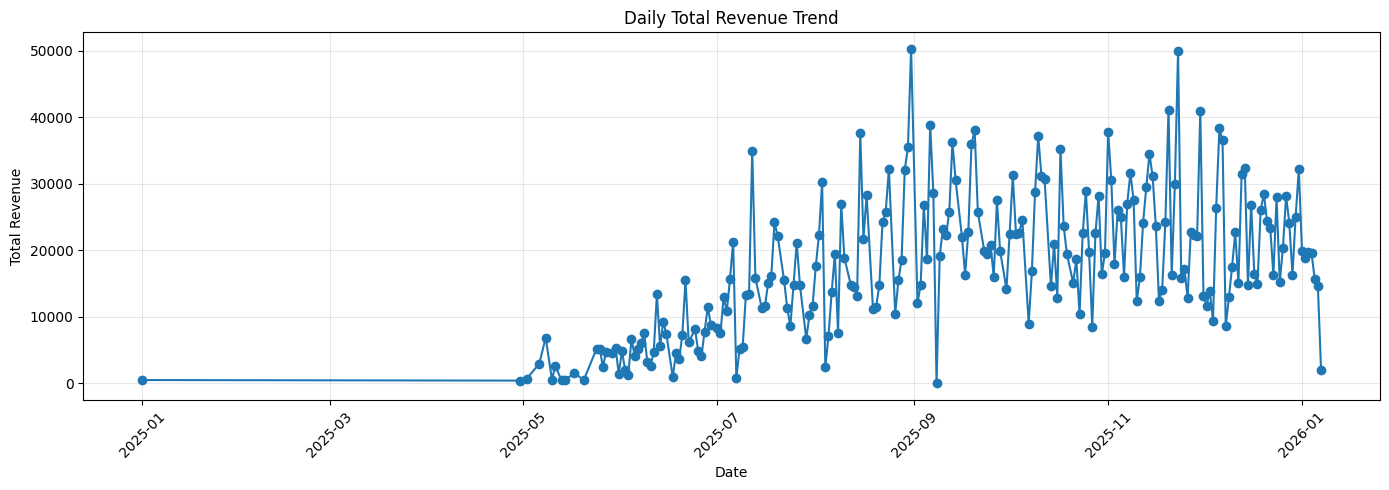

In [27]:
# Ensure correct dtypes
daily_revenue_combined["order_date"] = pd.to_datetime(daily_revenue_combined["order_date"])
daily_revenue_combined["total_revenue"] = pd.to_numeric(daily_revenue_combined["total_revenue"], errors="coerce")

# Sort from oldest to newest
daily_revenue_combined = daily_revenue_combined.sort_values("order_date")

# Plot
plt.figure(figsize=(14, 5))  # fits notebook width nicely
plt.plot(daily_revenue_combined["order_date"], daily_revenue_combined["total_revenue"], marker="o")

# Labels & title
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Daily Total Revenue Trend")

# Formatting
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()  # auto-fit everything

plt.show()

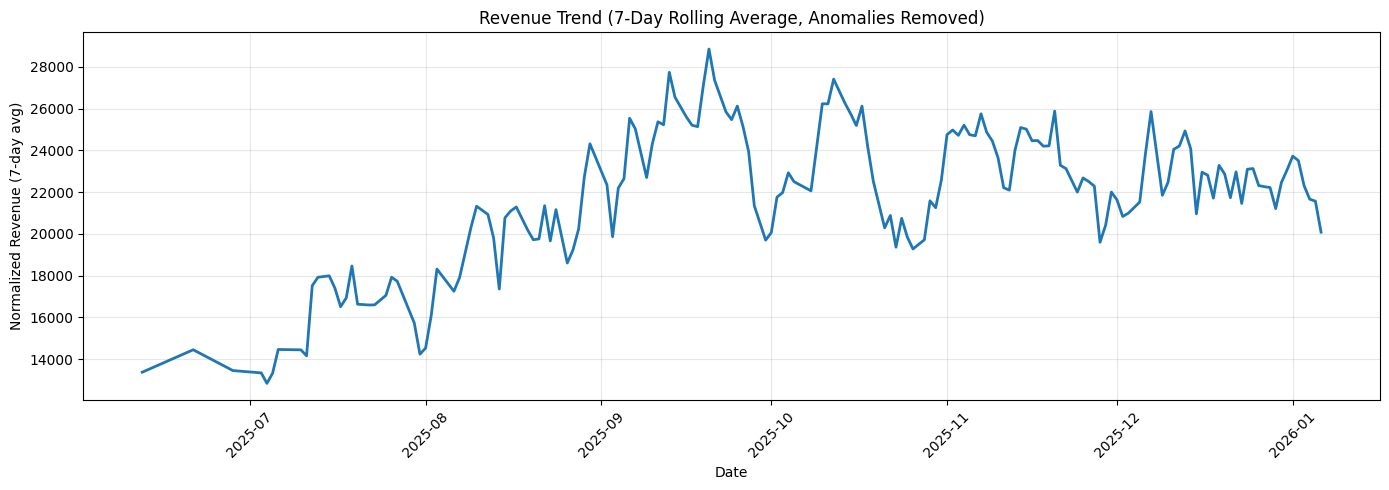

In [28]:


# Ensure datetime and sorting
daily_revenue_combined["order_date"] = pd.to_datetime(daily_revenue_combined["order_date"])
daily_revenue_combined = daily_revenue_combined.sort_values("order_date")

# ✅ Remove anomalies
clean_df = daily_revenue_combined[
    (daily_revenue_combined["total_revenue"] >= 10000) &
    (daily_revenue_combined["total_revenue"] <= 45000)
].copy()

# Rolling 7-day trend on cleaned data
clean_df["revenue_trend_7d"] = (
    clean_df["total_revenue"]
    .rolling(window=7, min_periods=1)
    .mean()
)

# Plot
plt.figure(figsize=(14,5))
plt.plot(clean_df["order_date"], clean_df["revenue_trend_7d"], linewidth=2)

plt.xlabel("Date")
plt.ylabel("Normalized Revenue (7-day avg)")
plt.title("Revenue Trend (7-Day Rolling Average, Anomalies Removed)")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


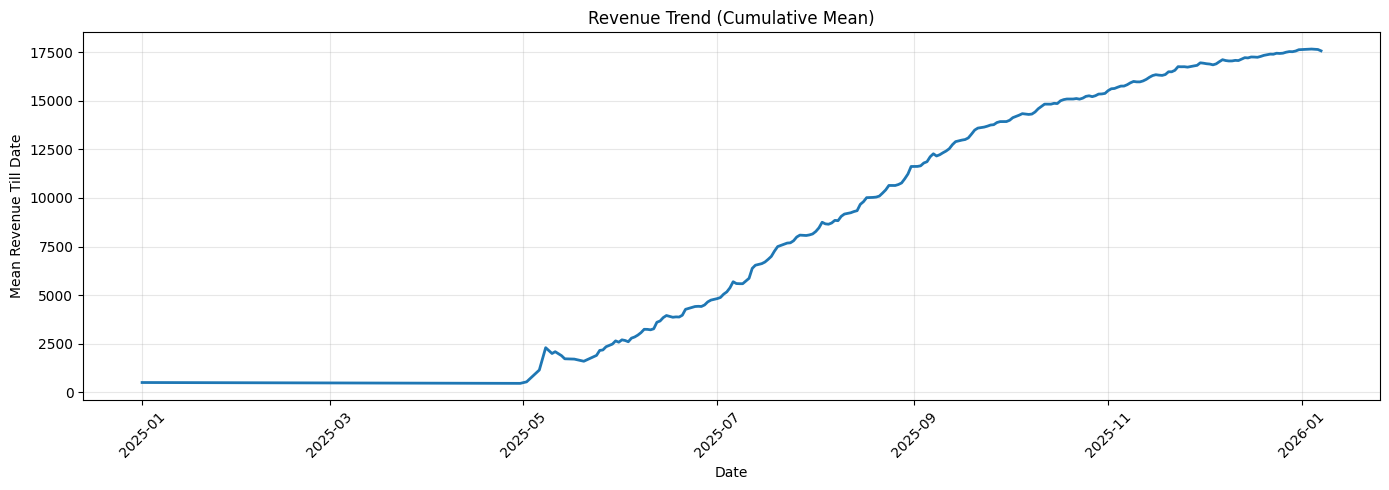

In [29]:


daily_revenue_combined["order_date"] = pd.to_datetime(daily_revenue_combined["order_date"])
daily_revenue_combined = daily_revenue_combined.sort_values("order_date")

# Mean till date (cumulative mean)
daily_revenue_combined["revenue_mean_till_date"] = (
    daily_revenue_combined["total_revenue"]
    .expanding(min_periods=1)
    .mean()
)

plt.figure(figsize=(14,5))
plt.plot(
    daily_revenue_combined["order_date"],
    daily_revenue_combined["revenue_mean_till_date"],
    linewidth=2
)

plt.xlabel("Date")
plt.ylabel("Mean Revenue Till Date")
plt.title("Revenue Trend (Cumulative Mean)")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


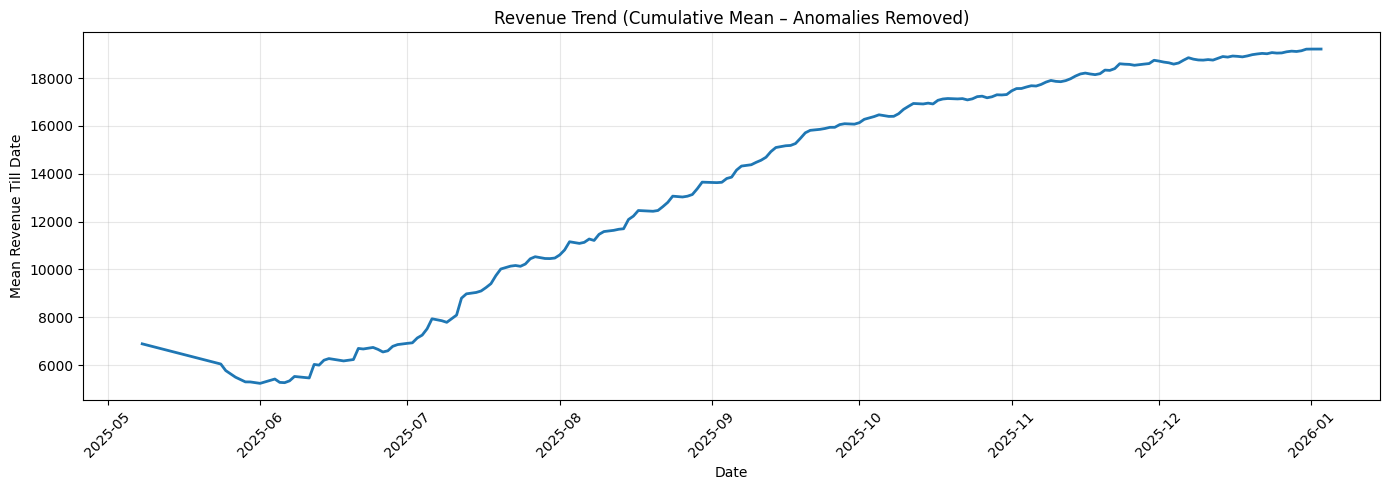

In [123]:

daily_revenue_combined["order_date"] = pd.to_datetime(daily_revenue_combined["order_date"])
daily_revenue_combined = daily_revenue_combined.sort_values("order_date")

# ✅ Remove anomalies
clean_df = daily_revenue_combined[
    (daily_revenue_combined["total_revenue"] >= 4000) &
    (daily_revenue_combined["total_revenue"] <= 50000)
].copy()

# Mean till date (cumulative mean) on filtered data
clean_df["revenue_mean_till_date"] = (
    clean_df["total_revenue"]
    .expanding(min_periods=1)
    .mean()
)

plt.figure(figsize=(14,5))
plt.plot(
    clean_df["order_date"],
    clean_df["revenue_mean_till_date"],
    linewidth=2
)

plt.xlabel("Date")
plt.ylabel("Mean Revenue Till Date")
plt.title("Revenue Trend (Cumulative Mean – Anomalies Removed)")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [125]:
df = daily_revenue_combined.copy()

df["order_date"] = pd.to_datetime(df["order_date"])

# Filter after July 2025
df = df[df["order_date"] >= "2025-07-01"]

low_order_days = df[
    (df["total_orders"] >= 1) &
    (df["total_orders"] <= 5)
].sort_values("order_date")


In [126]:
low_order_days

,order_date,total_revenue,net_revenue,tax_collected,total_orders,Home Website,POS,Swiggy,Zomato,revenue_trend_7d,revenue_mean_till_date
51,2025-07-07,805.0,680.0,0.00,1,805.0,0.0,0.0,0.0,11078.000000,5595.373077
53,2025-07-09,5536.0,4820.0,844.38,5,0.0,0.0,574.0,4962.0,10341.857143,5586.266667
76,2025-08-04,2425.0,2055.0,369.90,2,708.0,1717.0,0.0,0.0,14473.542857,8668.709091
107,2025-09-08,0.0,0.0,0.00,1,0.0,0.0,0.0,0.0,19964.428571,12161.940741


In [116]:


df = daily_revenue_combined.copy()
df["order_date"] = pd.to_datetime(df["order_date"])

high_revenue_days = df[df["total_revenue"] > 40000]

high_revenue_days[["order_date", "total_revenue"]].sort_values("order_date")

high_revenue_days[["order_date", "total_revenue", "total_orders"]].sort_values("order_date")


,order_date,total_revenue,total_orders
100,2025-08-31,50270.0,38
174,2025-11-20,41121.0,28
177,2025-11-23,49966.0,61
184,2025-11-30,40994.0,49


In [6]:
tables['customers']

,customer_id,order_id,order_from,order_created_on,name,gstin,phone,address
0,1,99999,POS,2025-01-01 10:00:00,Test User,,9999999999,Nowhere
1,2,15,POS,2025-04-30 11:53:37,,,,
2,3,16,Home Website,2025-05-02 16:09:24,Sumeet Malik,,7428846234,
3,4,17,Home Website,2025-05-02 16:33:25,Sumeet Malik,,7838886234,"M3M Merlin, Sector 67, Gurgaon Tower 2, Flat 7..."
4,5,18,Home Website,2025-05-02 17:14:05,Kshitij Sharma,,7428394442,"Sector 10A, Near Kadipur Road House 992 (Secto..."
...,...,...,...,...,...,...,...,...
5329,5330,5343,POS,2026-01-04 15:29:13,,,,
5330,5331,5344,Zomato,2026-01-04 15:53:14,Anshal Jain,,,"Sector 48, Sohna Road Delhi NCR India"
5331,5332,5345,Zomato,2026-01-04 15:54:06,Paridhi Singhal,,,"Sector 48, Sohna Road Delhi NCR India"
5332,5333,5346,Zomato,2026-01-04 15:58:11,Adrita,,,"Sector 50, Gurgaon Delhi NCR India"


In [11]:
df = tables['customers'].copy()
df['full_name'] = df['name'] + ' ' + df['address'] + df['order_from']

In [23]:
x = df['full_name'].unique().tolist()

In [16]:
df[df['order_from'].isin(["Zomato", "Swiggy"])]['full_name'].nunique()

2426

In [17]:
df[df['order_from'].isin(["Zomato", "Swiggy"])]['order_id'].nunique()

3672

In [18]:
df_filtered = df[
    df["order_from"]
    .str.strip()
    .str.lower()
    .isin(["zomato"])
    &
    (df["order_created_on"] >= "2025-12-01")
    &
    (df["order_created_on"] < "2026-01-01")
]

In [32]:
df_filtered['full_name'].nunique()

370

In [33]:
df_filtered['order_id'].nunique()

440

In [24]:
y = df_filtered['full_name'].unique().tolist()

In [54]:
count = sum(1 for v in x if v in y)

In [29]:
df_filtered['order_id'].nunique()

In [46]:
y = df[df['order_from'].isin(["Zomato"])]['full_name'].unique().tolist()

In [52]:
x = df_filtered['full_name'].unique().tolist()

In [53]:
len(x)

370

In [57]:
df["order_created_on"] = pd.to_datetime(
    df["order_created_on"], errors="coerce"
)


In [58]:
customers_before_dec = set(
    df[df["order_created_on"] < "2025-12-01"]["full_name"]
    .dropna()
)

In [59]:
customers_in_dec = set(
    df[
        (df["order_created_on"] >= "2025-12-01") &
        (df["order_created_on"] < "2026-01-01")
    ]["full_name"]
    .dropna()
)

In [60]:
repeat_customers_dec = customers_in_dec & customers_before_dec
len(repeat_customers_dec)

163

In [63]:
df["order_created_on"] = pd.to_datetime(df["order_created_on"], errors="coerce")
df["order_from"] = df["order_from"].str.strip().str.lower()

df_zomato = df[df["order_from"] == "zomato"]

df_zomato = df_zomato.sort_values(
    ["full_name", "order_created_on"]
)

df_zomato["is_first_order"] = (
    df_zomato.groupby("full_name")
    .cumcount()
    .eq(0)
)

dec_zomato = df_zomato[
    (df_zomato["order_created_on"] >= "2025-12-01") &
    (df_zomato["order_created_on"] < "2026-01-01")
]

repeat_orders_dec = dec_zomato[~dec_zomato["is_first_order"]]

repeat_orders = repeat_orders_dec["order_id"].nunique()
total_orders = dec_zomato["order_id"].nunique()

repeat_orders, total_orders

(169, 440)